LIBS

In [2]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'tesseract/tesseract.exe'

import numpy as np
import cv2 
import matplotlib.pyplot as plt

import re

IMAGEM

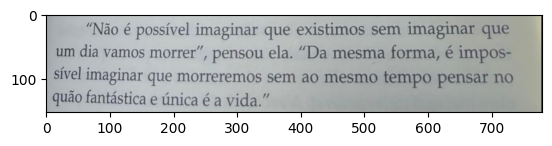

In [14]:
img = cv2.imread('text-recognize/Imagens/Aula2-trecho-livro.png')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(rgb_img)

In [17]:
config_tesseract = '--tessdata-dir tesseract/tessdata --psm 6'

texto = pytesseract.image_to_string(gray_img, lang='por', config=config_tesseract)
print(texto)

“Não é possível imaginar que existimos sem imaginar que
um dia vamos morrer”, pensou ela. “Da mesma forma, é impos-
sível imaginar que morreremos sem ao mesmo tempo pensar no
quão fantástica e única é a vida.”



PLACA CARRO

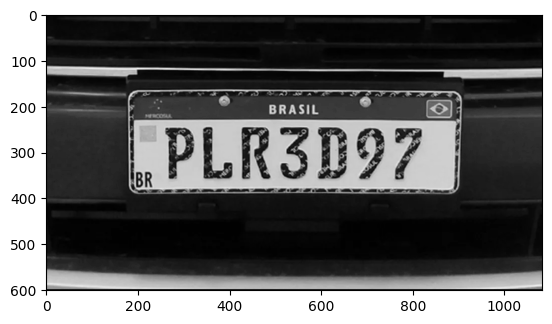

In [4]:
img = cv2.imread('placas_imagens/placa_carro1.png')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img,cmap='gray')

In [29]:
config_tesseract = '--tessdata-dir tesseract/tessdata --psm 6'

texto = pytesseract.image_to_string(gray_img, lang='por', config=config_tesseract)
print(texto)

 PLR$D97.
o.



TRATAMENTO DAS IMAGENS

In [44]:
def limiarizacao(gray_img, intensidade=125):
    valor, lim_img = cv2.threshold(gray_img, 
                               intensidade, 
                               255, 
                               cv2.THRESH_BINARY
                               )
    return lim_img

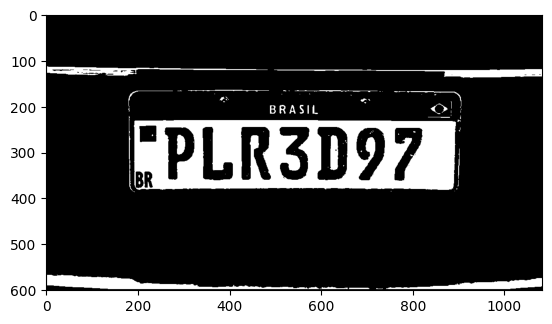

In [45]:
lim_img = limiarizacao(gray_img, 170)
plt.imshow(lim_img, cmap='gray')

In [46]:
config_tesseract = '--tessdata-dir tesseract/tessdata --psm 6'

texto = pytesseract.image_to_string(lim_img, lang='por', config=config_tesseract)
print(texto)

FPLR3D97,



In [47]:
def limiarizacao_auto(gray_img, size = 11, c=8):
    lim_img = cv2.adaptiveThreshold(gray_img,
                                    255,
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY,
                                    size,
                                    c
                                    )
    return lim_img

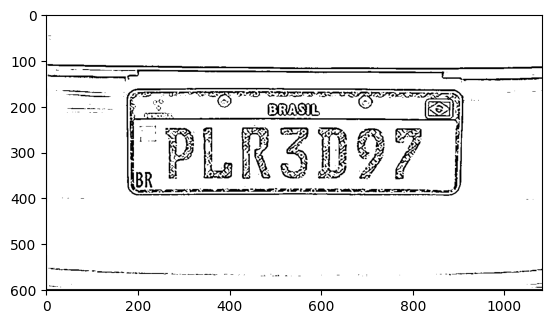

In [50]:
auto_lim_img = limiarizacao_auto(gray_img)
plt.imshow(auto_lim_img, cmap='gray')

In [51]:
config_tesseract = '--tessdata-dir tesseract/tessdata --psm 6'

texto = pytesseract.image_to_string(auto_lim_img, lang='por', config=config_tesseract)
print(texto)

MATEI A



HISTOGRAMA INTENSIDADE

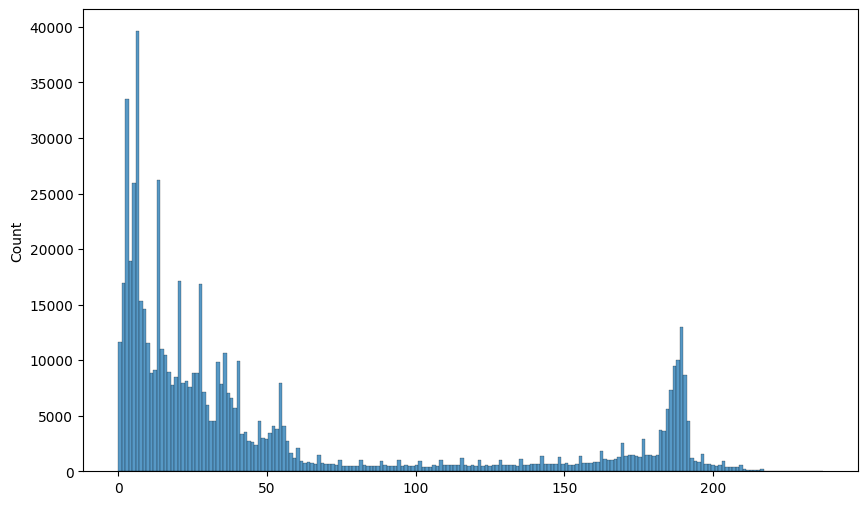

In [52]:
import seaborn as sns 
ax = sns.histplot(gray_img.flatten())
ax.figure.set_size_inches(10,6)

In [55]:
def limiarizacao_otsu(gray_img8):
    valor, lim_img = cv2.threshold(gray_img,
                                    0,
                                    255,
                                    cv2.THRESH_BINARY+cv2.THRESH_OTSU
                                    )
    return lim_img

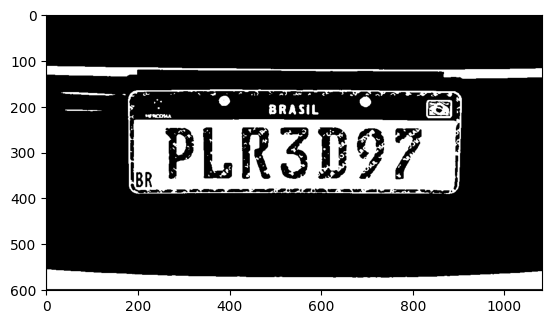

In [57]:
otsu_img = limiarizacao_otsu(gray_img)
plt.imshow(otsu_img, cmap='gray')

In [59]:
config_tesseract = '--tessdata-dir tesseract/tessdata'

texto = pytesseract.image_to_string(otsu_img, lang='por', config=config_tesseract)
print(texto)

TRANSFORMACAO MORFOLOGICA

In [78]:
image_to_treat = otsu_img.copy()

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

erosao_img = cv2.erode(image_to_treat, kernel)
dilat_img = cv2.dilate(image_to_treat, kernel)

abertura_img = cv2.morphologyEx(image_to_treat, cv2.MORPH_OPEN, kernel)
fechamento_img = cv2.morphologyEx(image_to_treat, cv2.MORPH_CLOSE, kernel)

gradiente_img = cv2.morphologyEx(image_to_treat, cv2.MORPH_GRADIENT, kernel)
cartola_img = cv2.morphologyEx(image_to_treat, cv2.MORPH_TOPHAT, kernel)
blackhat_img = cv2.morphologyEx(image_to_treat, cv2.MORPH_BLACKHAT, kernel)

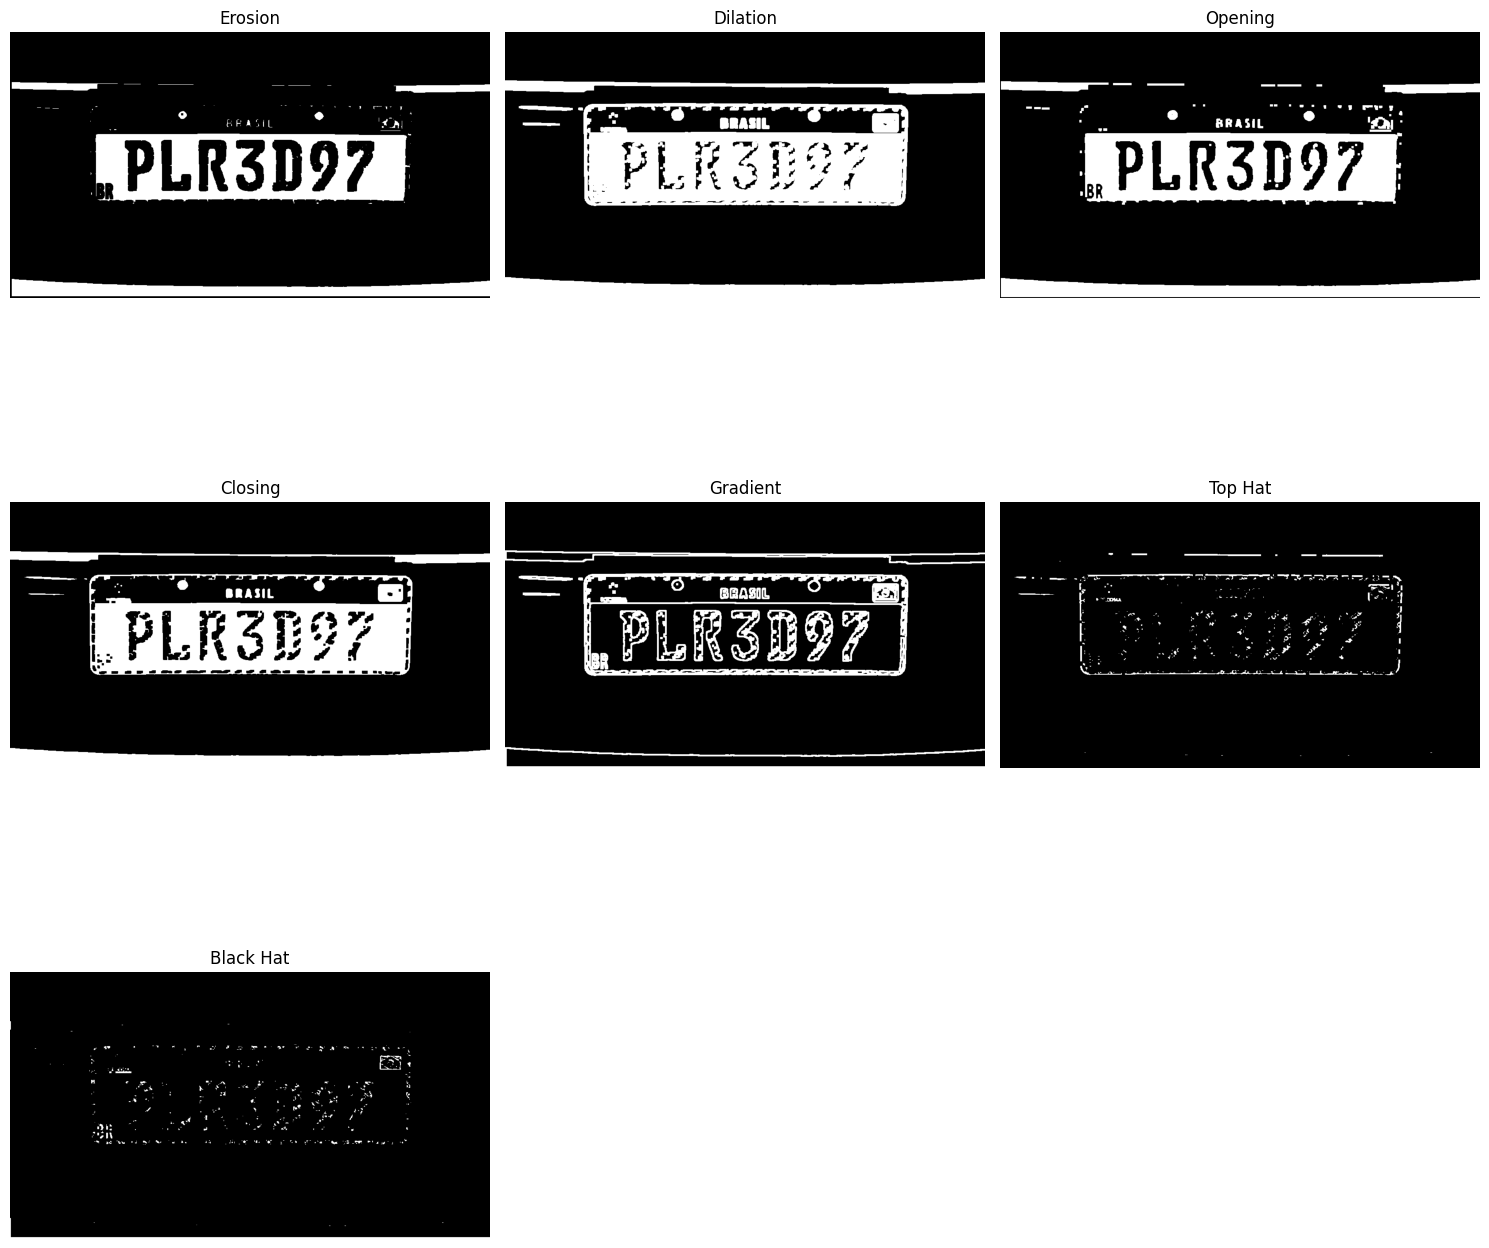

In [79]:
# Plot the results
plt.figure(figsize=(15, 15))

# Erosion
plt.subplot(3, 3, 1)
plt.title("Erosion")
plt.imshow(erosao_img, cmap='gray')
plt.axis("off")

# Dilation
plt.subplot(3, 3, 2)
plt.title("Dilation")
plt.imshow(dilat_img, cmap='gray')
plt.axis("off")

# Opening
plt.subplot(3, 3, 3)
plt.title("Opening")
plt.imshow(abertura_img, cmap='gray')
plt.axis("off")

# Closing
plt.subplot(3, 3, 4)
plt.title("Closing")
plt.imshow(fechamento_img, cmap='gray')
plt.axis("off")

# Gradient
plt.subplot(3, 3, 5)
plt.title("Gradient")
plt.imshow(gradiente_img, cmap='gray')
plt.axis("off")

# Top Hat
plt.subplot(3, 3, 6)
plt.title("Top Hat")
plt.imshow(cartola_img, cmap='gray')
plt.axis("off")

# Black Hat
plt.subplot(3, 3, 7)
plt.title("Black Hat")
plt.imshow(blackhat_img, cmap='gray')
plt.axis("off")

# Show the plot
plt.tight_layout()
plt.show()


In [80]:
config_tesseract = '--tessdata-dir tesseract/tessdata --psm 6'

texto = pytesseract.image_to_string(erosao_img, lang='por', config=config_tesseract)
print(texto)

| PLRSD97;
(TT



FOCAR NA PLACA

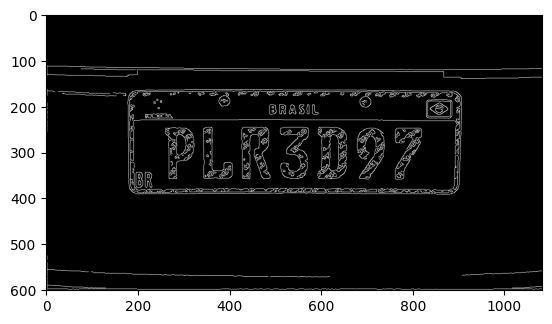

In [82]:
bordas = cv2.Canny(gray_img, 100, 200)
plt.imshow(bordas, cmap='gray')

In [83]:
contornos, _ = cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contornos:
    epsilon = 0.02 * cv2.arcLength(cnt,True)
    aproximacao = cv2.approxPolyDP(cnt, epsilon, True)
    if cv2.isContourConvex(aproximacao) and len(aproximacao) == 4:
        localizacao = aproximacao
        break
    
localizacao

array([[[180, 178]],

       [[196, 391]],

       [[901, 375]],

       [[894, 168]]], dtype=int32)

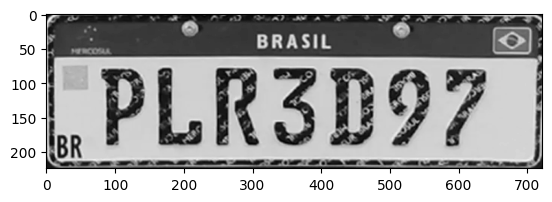

In [88]:
x, y, w, h = cv2.boundingRect(localizacao)

placa_focada_img = gray_img[y:y+h, x:x+w]

plt.imshow(placa_focada_img, cmap='gray')

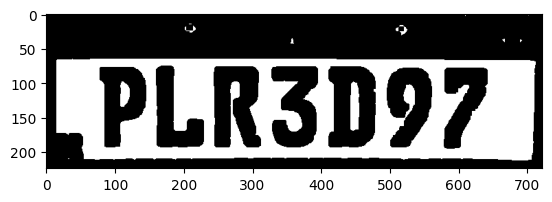

In [103]:
valor, placa_focada_otsu_img = cv2.threshold(placa_focada_img,
                                0,
                                255,
                                cv2.THRESH_BINARY+cv2.THRESH_OTSU
                                )

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))

placa_focada_erosao_img = cv2.erode(placa_focada_otsu_img, kernel)
plt.imshow(placa_focada_erosao_img, cmap='gray')


In [104]:
config_tesseract = '--tessdata-dir tesseract/tessdata --psm 6'

texto = pytesseract.image_to_string(placa_focada_erosao_img, lang='por', config=config_tesseract)
print(texto)

o > o
|
 PLR3D97|



In [107]:
regex = re.compile(r'\b[a-zA-Z0-9]{7}\b')

config_tesseract = '--tessdata-dir tesseract/tessdata --psm 6'

texto = pytesseract.image_to_string(placa_focada_erosao_img, lang='por', config=config_tesseract)

placa = regex.findall(texto)
print(placa)

['PLR3D97']
